In [1]:
from pathlib import Path

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)

from utils import get_fragmented_ligand, read_fragment_library

In [2]:
# Path to library folder
PATH_TO_LIB = Path('.') / '..' / 'data' / 'fragment_library'
# Use utils function to read fragment library
fragment_library = read_fragment_library(PATH_TO_LIB)
fragment_library.keys()

dict_keys(['AP', 'FP', 'SE', 'GA', 'B1', 'B2', 'X'])

In [3]:
def draw_fragmented_ligand_wdummy(fragment_library, complex_pdb, ligand_pdb, mols_per_row=6):
    """
    Show fragments with subpocket assignment for ligand by PDB ID.
    
    Parameters
    ----------
    fragment_library : dict of pandas.DataFrame
        Fragment details, i.e. SMILES, and fragment RDKit molecules, KLIFS and fragmentation details (values)
        for each subpocket (key).
    complex_pdb : str
        PDB ID for structure with ligand of interest.
    ligand_pdb : str
        PDB ID for ligand of interest.
    
    Returns
    -------
    PIL.PngImagePlugin.PngImageFile
        Fragmented ligand.
    """
    
    fragmented_ligand = get_fragmented_ligand(fragment_library, complex_pdb, ligand_pdb)
    
    img = Draw.MolsToGridImage(
        fragmented_ligand.ROMol_dummy.tolist(), 
        legends=fragmented_ligand.subpocket.tolist(), 
        molsPerRow=mols_per_row
    )
    
    return img

### Pick one example from theoretical library
* https://github.com/volkamerlab/KinFragLib/blob/ligand_analysis/notebooks/4_3_combinatorial_library_comparison_klifs.ipynb
* second row first from the left

### Manually check if AP fragment is in reduced library and draw it
* Found 34 times: 1 | 78 | 11 | 34 | 3nga | 3NG

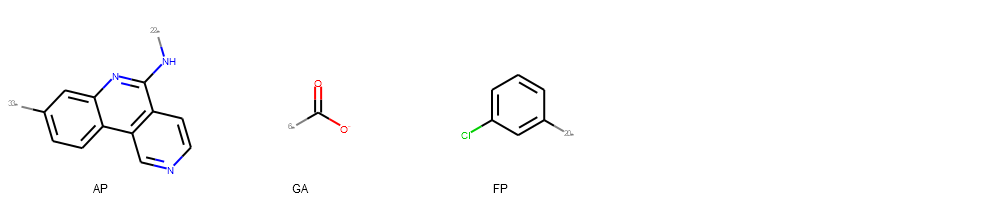

In [9]:
complex_pdb='3nga'
ligand_pdb='3NG'

draw_fragmented_ligand_wdummy(fragment_library, complex_pdb, ligand_pdb, mols_per_row=5)

### Manually check if GA fragment is in reduced library and draw it
* note: different charge
* Found 47 times: 11 | 6 | 47 | 5 | 2wip | P49

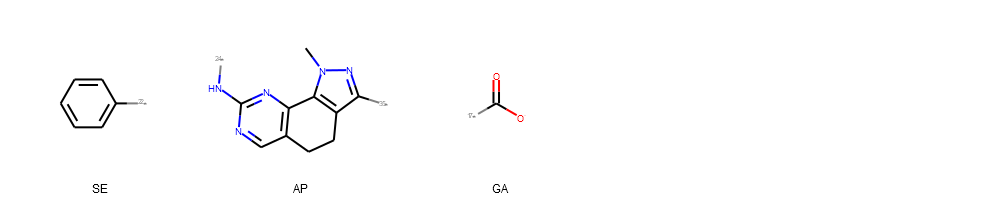

In [10]:
complex_pdb='2wip'
ligand_pdb='P49'

draw_fragmented_ligand_wdummy(fragment_library, complex_pdb, ligand_pdb, mols_per_row=5)

### Manually check if FP fragment is in reduced library and draw it
* Found 24 times: 19 | 8 | 24 | 4 | 3uo6 | 0BY

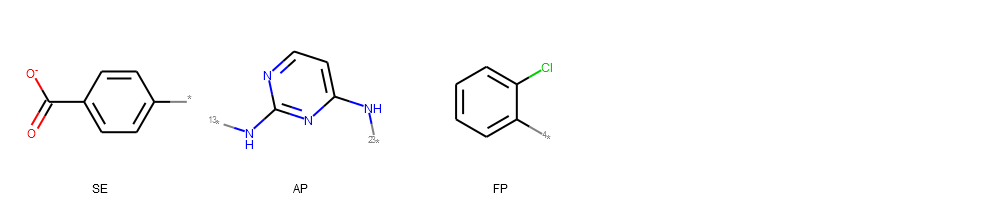

In [11]:
complex_pdb='3uo6'
ligand_pdb='0BY'

draw_fragmented_ligand_wdummy(fragment_library, complex_pdb, ligand_pdb, mols_per_row=5)

### Note: Selected FP Fragment hast different dummy atom position than missed theoretical ligand (3nga)!
I just checked below the different attachment possibilities -> part of the solution could be to check for smiles_dummy matches instead of just smiles matches?

Shape of FP fragment DataFrame:  (1866, 15)
Shape of FP fragment subset:  (24, 15)


,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
93,,,,AurA,Aur,Other,3uo6,0BY,,B,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[4*]c1ccccc1Cl,FP
97,,,,AurA,Aur,Other,3uok,0C6,,B,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[11*]c1ccccc1Cl,FP
98,,,,AurA,Aur,Other,3uol,0C7,,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[11*]c1ccccc1Cl,FP
183,,,,BTK,Tec,TK,5bq0,4US,A,A,FP FP FP FP FP FP FP FP FP FP FP SE,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[14*]c1ccccc1Cl,FP
501,,,,CDK9,CDK,CMGC,3blr,CPB,,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[22*]c1ccccc1Cl,FP
624,,,,CK2a1,CK2,CMGC,3nga,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
625,,,,CK2a1,CK2,CMGC,3pe1,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
649,,,,CK2a2,CK2,CMGC,6hmb,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
660,,,,CLK1,CLK,CMGC,6khd,3NG,A,B,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
666,,,,CLK2,CLK,CMGC,6fyl,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP

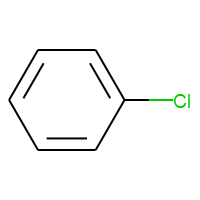
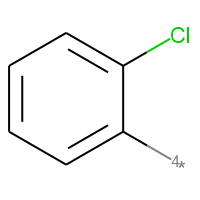
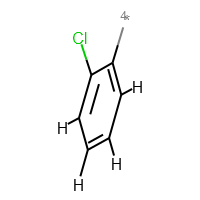
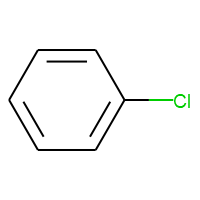
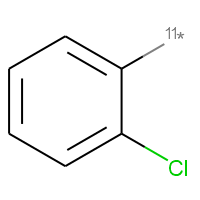
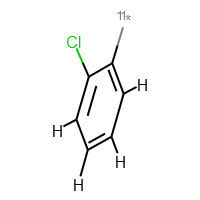
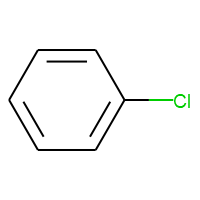
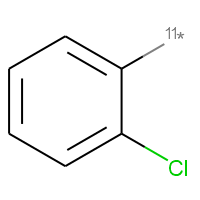
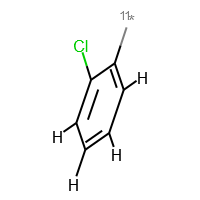
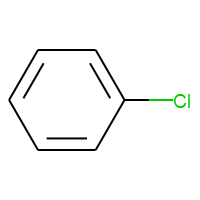
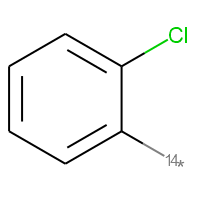
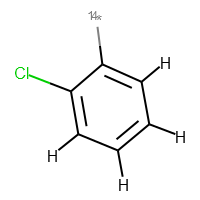
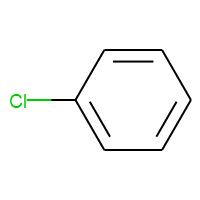
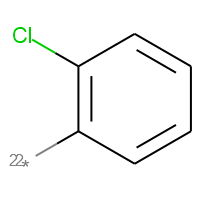
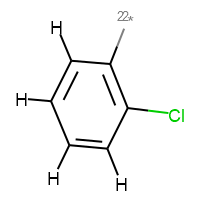
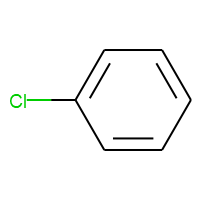
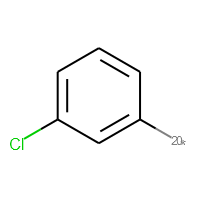
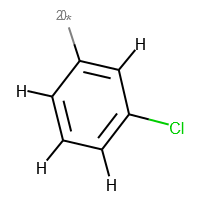
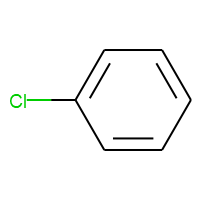
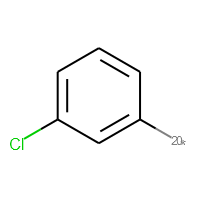
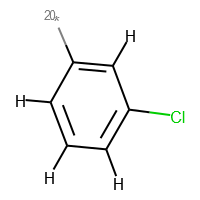
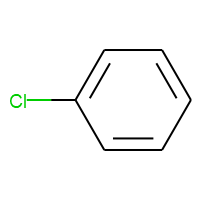
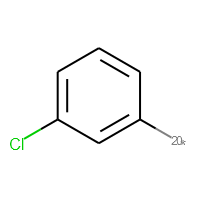
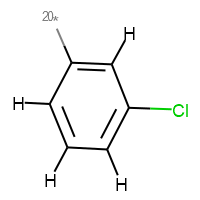
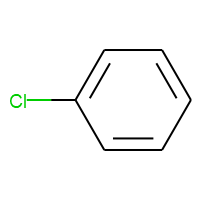
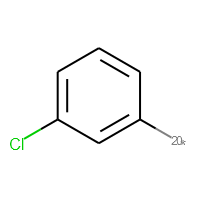
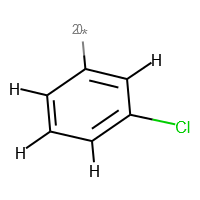
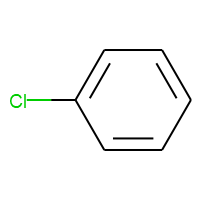
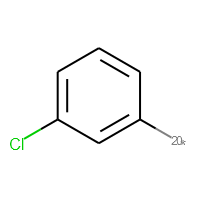
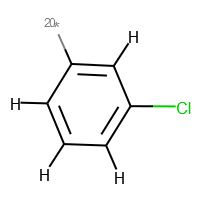
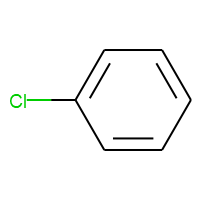
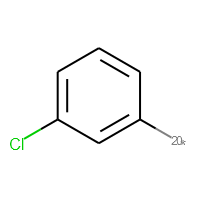
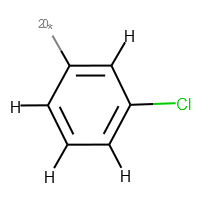
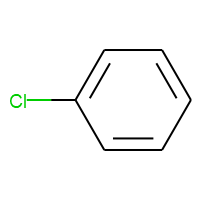
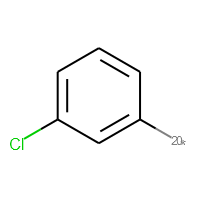
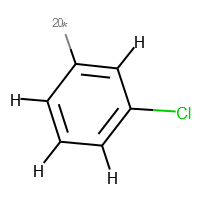
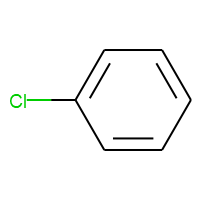
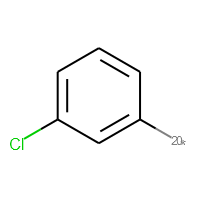
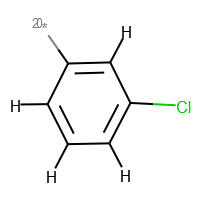
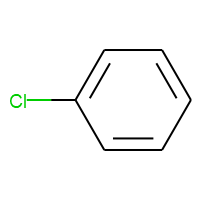
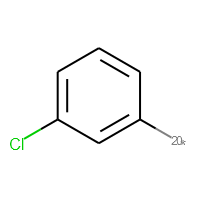
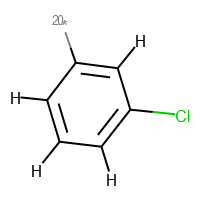
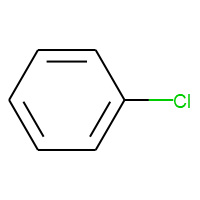
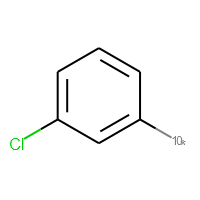
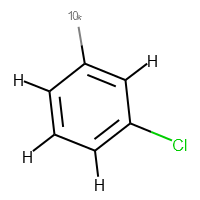
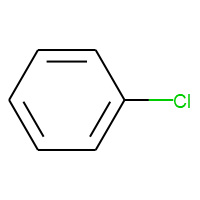
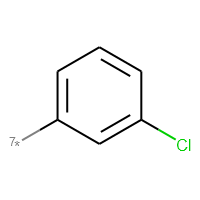
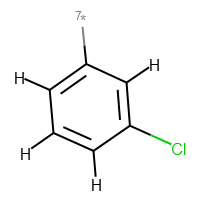
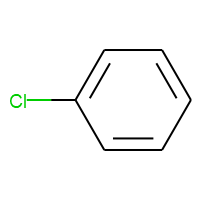
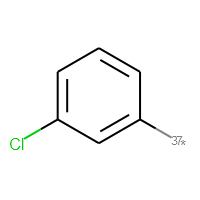
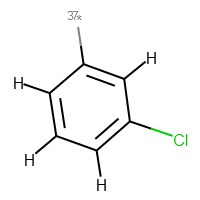
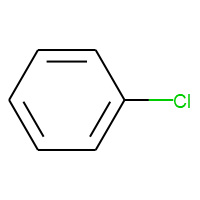
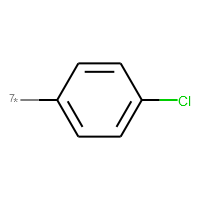
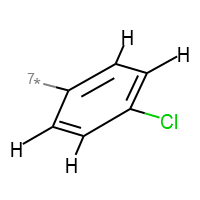
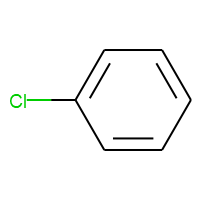
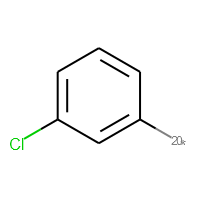
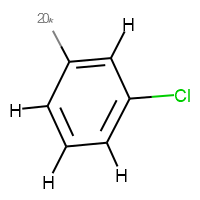
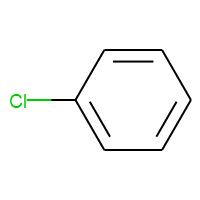
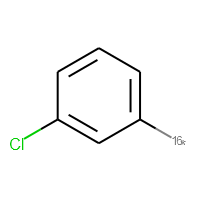
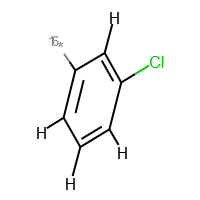
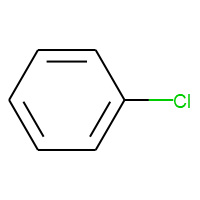
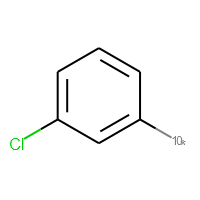
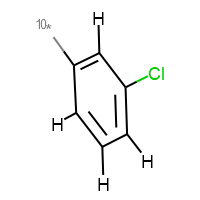
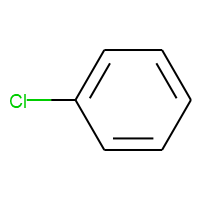
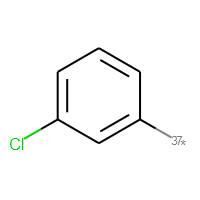
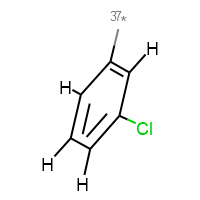
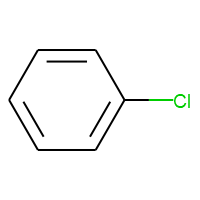
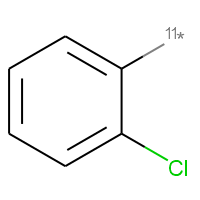
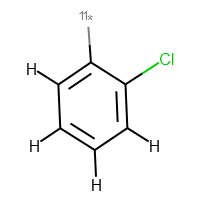
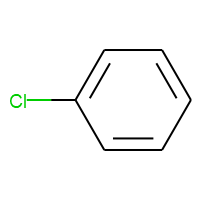
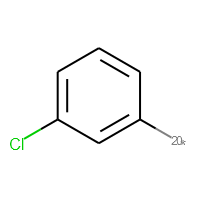
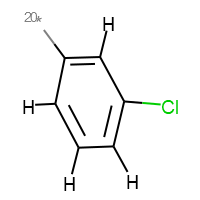

In [12]:
fp_fragments = fragment_library['FP']
print('Shape of FP fragment DataFrame: ', fp_fragments.shape)
fp_fragment_subset=fp_fragments[fp_fragments.smiles=='Clc1ccccc1']
print('Shape of FP fragment subset: ', fp_fragment_subset.shape)
fp_fragment_subset.head(24)

Shape of FP fragment subset dummy:  (11, 15)


,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
624,,,,CK2a1,CK2,CMGC,3nga,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
625,,,,CK2a1,CK2,CMGC,3pe1,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
649,,,,CK2a2,CK2,CMGC,6hmb,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
660,,,,CLK1,CLK,CMGC,6khd,3NG,A,B,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
666,,,,CLK2,CLK,CMGC,6fyl,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
667,,,,CLK2,CLK,CMGC,6khe,3NG,,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
671,,,,CLK3,CLK,CMGC,6fyp,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
672,,,,CLK3,CLK,CMGC,6khf,3NG,B,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
673,,,,CLK4,CLK,CMGC,6fyv,3NG,B,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP
972,,,,HIPK2,DYRK,CMGC,6p5s,3NG,A,A,FP FP FP FP FP FP FP FP FP FP FP AP,16 16 16 16 16 16 16 16 16 16 16 na,Clc1ccccc1,[20*]c1cccc(Cl)c1,FP

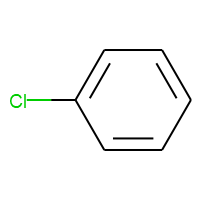
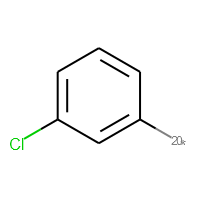
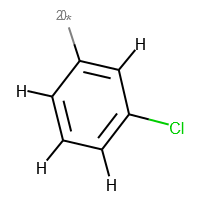
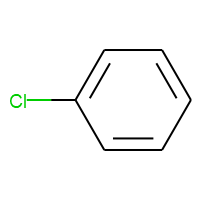
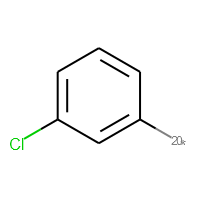
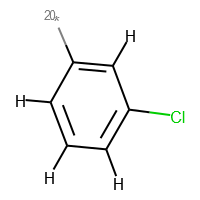
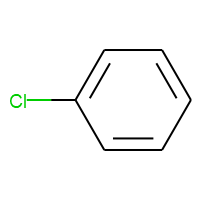
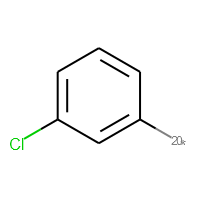
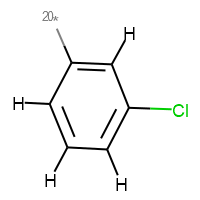
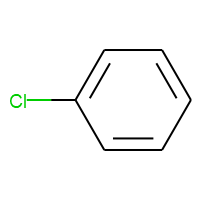
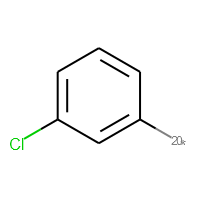
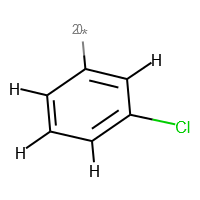
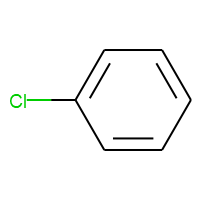
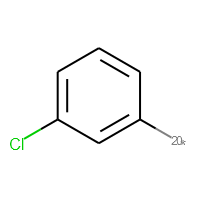
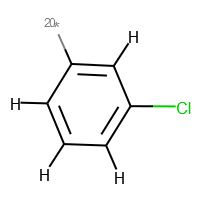
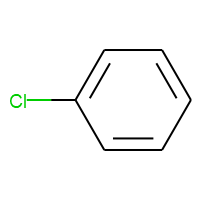
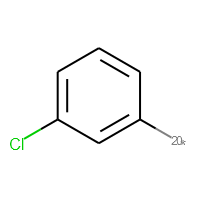
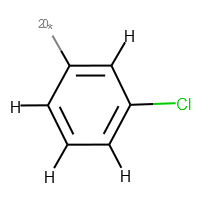
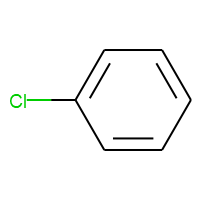
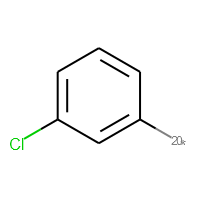
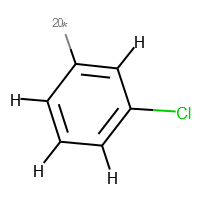
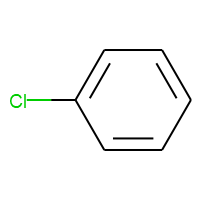
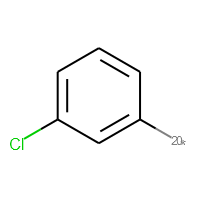
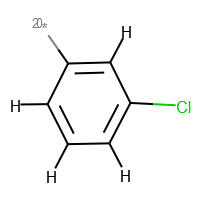
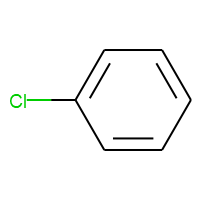
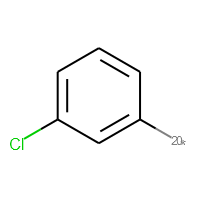
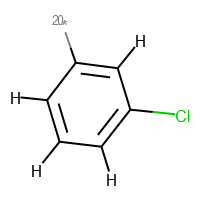
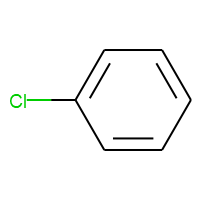
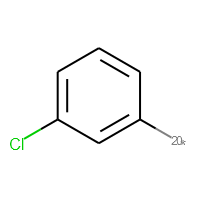
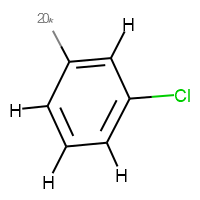
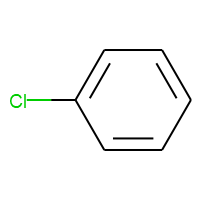
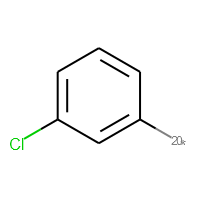
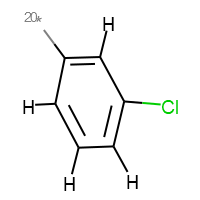

In [13]:
fp_fragment_subset_dummy=fp_fragments[fp_fragments.smiles_dummy=='[20*]c1cccc(Cl)c1']
print('Shape of FP fragment subset dummy: ', fp_fragment_subset_dummy.shape)
fp_fragment_subset_dummy.head(24)